In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.filters import sobel
from skimage.draw import circle_perimeter
from skimage.morphology import *
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.exposure import equalize_hist
import numpy as np
import cv2
import sys

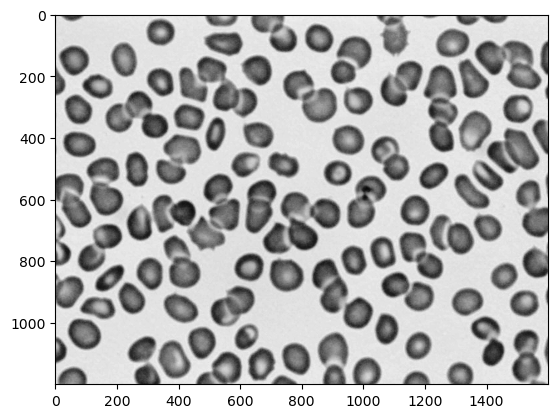

In [2]:
imagem = io.imread("0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png")
red_img = imagem [:, :, 0]
green_img = imagem [:, :, 1]
blue_img = imagem [:, :, 2]
plt.imshow(red_img, cmap='gray')

plt.imshow(green_img, cmap='gray')

plt.imshow(blue_img, cmap='gray')

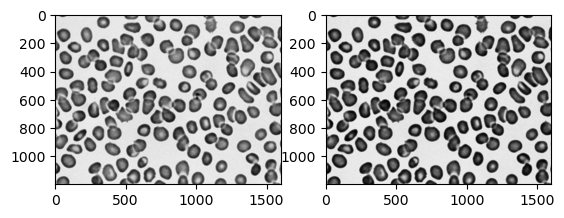

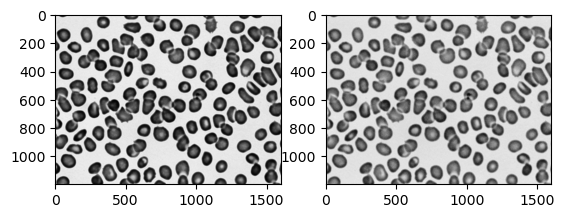

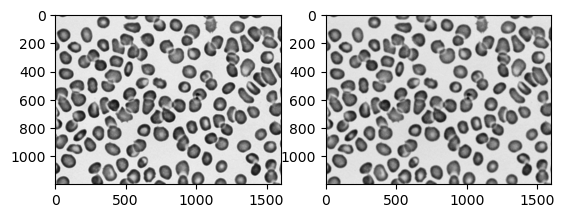

In [3]:
_,ax = plt.subplots (1,2)
ax[0].imshow (red_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (green_img,cmap='gray',vmin=0,vmax=255)
_,ax = plt.subplots (1,2)
ax[0].imshow (green_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (blue_img,cmap='gray',vmin=0,vmax=255)
_,ax = plt.subplots (1,2)
ax[0].imshow (red_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (blue_img,cmap='gray',vmin=0,vmax=255)

In [4]:
blue_img.shape

(1200, 1600)

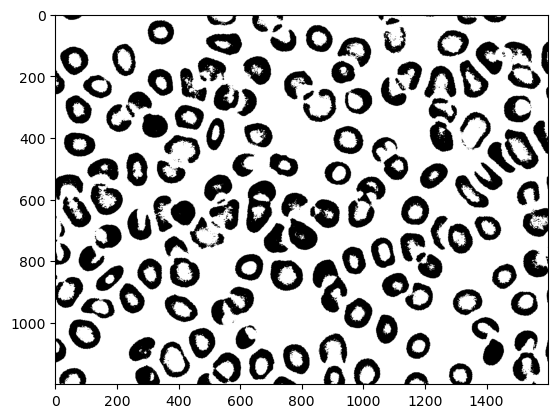

In [5]:
binaria = blue_img.copy()
limiar = imagem.max() * (110 / 256)
binaria [binaria <= limiar] = 0
binaria [binaria > 0] = 1
plt.imshow(binaria * 255, cmap='gray')

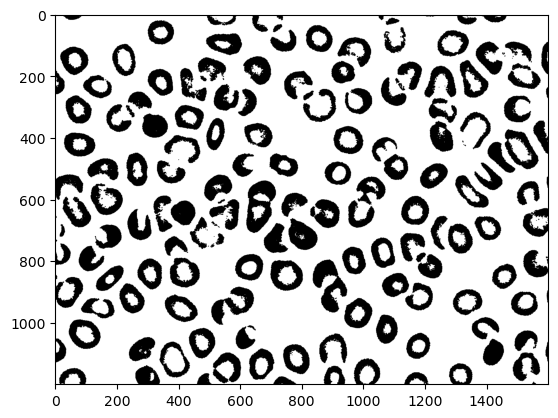

In [6]:
binary = binary_opening (binaria)
binary = binary_closing (binaria)

plt.imshow(binary, cmap='gray')

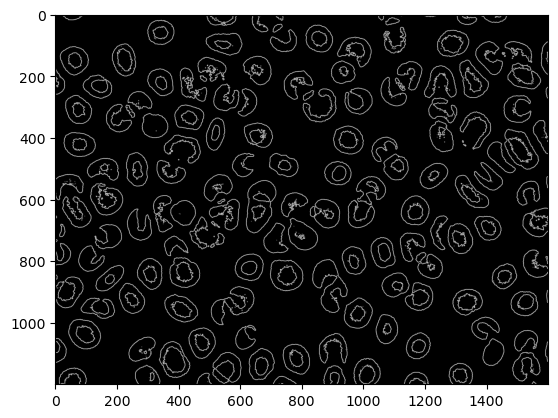

In [7]:
edges = sobel(binary)

plt.imshow(edges, cmap='gray')

In [8]:
raios = np.arange(40, 50, 2)
hough_grade = hough_circle (edges, raios)

In [32]:
acumulador, a, b, raio = hough_circle_peaks (hough_grade, raios,total_num_peaks = 200)

[0.65416667 0.65416667 0.65234375 0.63636364 0.63362069 0.62916667
 0.625      0.62083333 0.61742424 0.609375   0.60344828 0.59090909
 0.5859375  0.57575758 0.57421875 0.57421875 0.57327586 0.57327586
 0.5625     0.55859375 0.55833333 0.55833333 0.55603448 0.55357143
 0.55357143 0.55172414 0.55172414 0.55078125 0.54545455 0.54285714
 0.54166667 0.54166667 0.53448276 0.53448276 0.53333333 0.53017241
 0.52916667 0.52734375 0.52586207 0.525      0.5234375  0.52155172
 0.52142857 0.52083333 0.51953125 0.51666667 0.515625   0.51293103
 0.51293103 0.51293103 0.5125     0.51136364 0.50833333 0.50431034
 0.50431034 0.50431034 0.50431034 0.5        0.49609375 0.49583333
 0.4921875  0.49166667 0.49166667 0.49137931 0.49137931 0.48828125
 0.48828125 0.48706897 0.48706897 0.48706897 0.48484848 0.48333333
 0.48333333 0.48275862 0.48046875 0.48046875 0.48046875 0.47916667
 0.47916667 0.47916667 0.47916667 0.47844828 0.47844828 0.47844828
 0.4765625  0.475      0.475      0.475      0.475      0.475


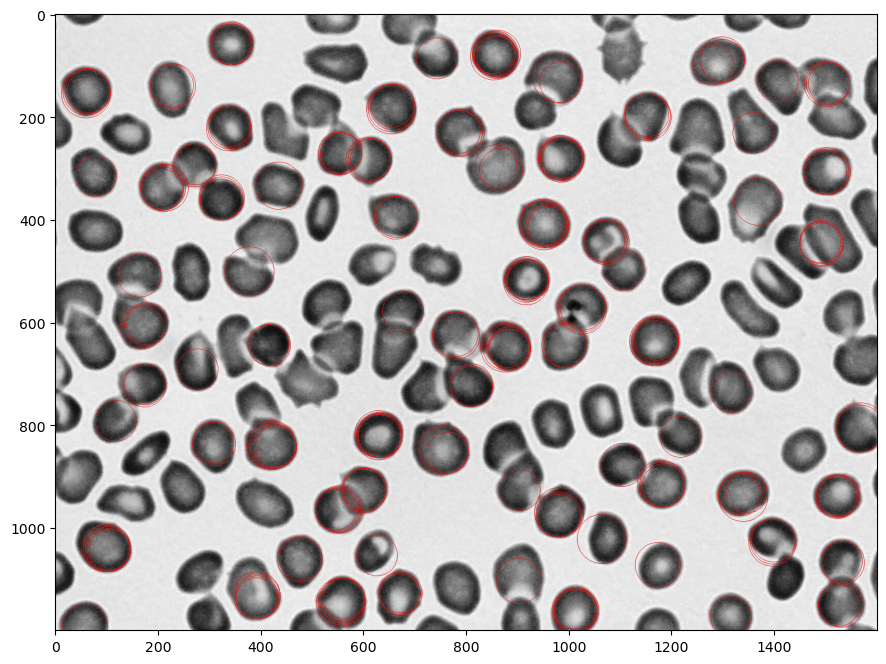

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))
image = color.gray2rgb(red_img)

for center_y, center_x, radius in zip(b, a, raio):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape = image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
print((acumulador) , raio)

In [34]:
0.65416667 - 0.65416667

0.0

In [37]:
acumulador.shape

(200,)

In [36]:
import numpy as np
from scipy.spatial.distance import cdist

# Defina os parâmetros do algoritmo de detecção de círculos
radius_range = (10, 20)
min_distance = 30

# # Executa a detecção de círculos usando a transformada de Hough
# hough_radii = np.arange(*radius_range)
# hough_res = hough_circle(img, hough_radii)
# centers, accums, _ = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=10)
# # acumulador, a, b, raio = hough_circle_peaks (hough_grade, raios,total_num_peaks = 3)
# Transforma acumulador em matriz 2D
acumulador_2d = np.reshape(acumulador, (-1, 3))

# Remove círculos duplicados
distances = cdist(acumulador_2d, acumulador_2d)
for i in range(len(acumulador)):
    for j in range(i+1, len(acumulador)):
        if distances[i, j] < min_distance:
            # Os círculos i e j são muito próximos. Escolhe o círculo com maior valor de acúmulo
            if a[i] > a[j]:
                acumulador[j] = np.nan  # Marca o círculo j como inválido
            else:
                acumulador[i] = np.nan  # Marca o círculo i como inválido

# Conta o número de círculos válidos
num_circles = np.sum(~np.isnan(acumulador))


ValueError: cannot reshape array of size 200 into shape (3)